## Importing the dataset and important Libraries

In [28]:
# importing the important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
#importing the dataset

df = pd.read_csv(r"C:\Users\sahas\Downloads\heart.csv")

In [5]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

#### There are no missing values in the dataset

In [8]:
#checking for outliers
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Data Visualization

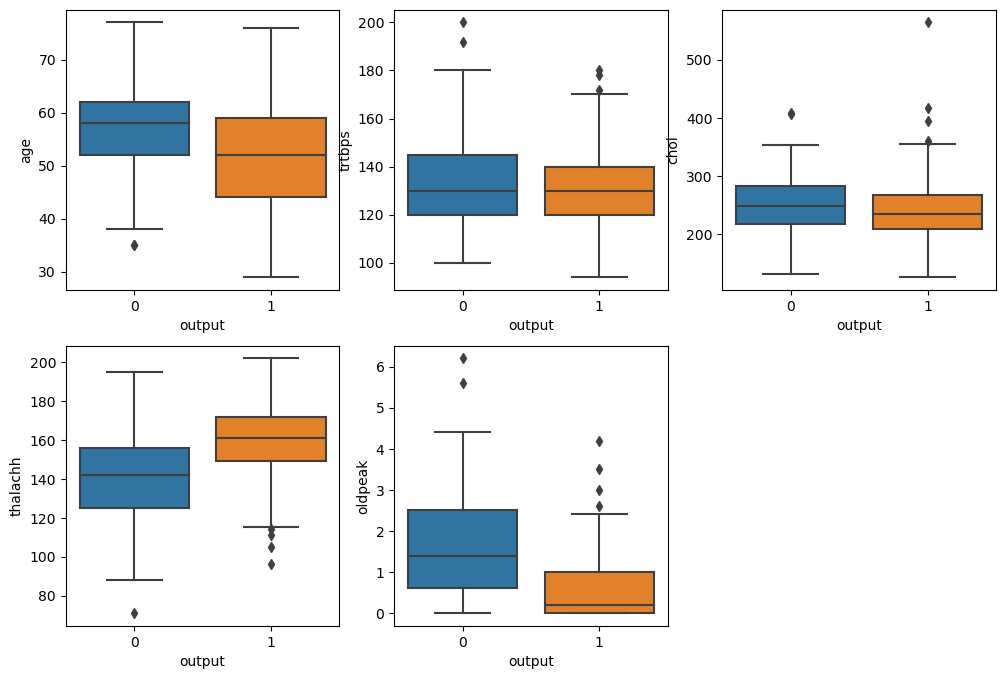

In [22]:
#visualizing continuous data
plt.figure(figsize=(12, 8))
plt.subplot(2,3,1)
sns.boxplot(y = 'age',x='output', data = df)
plt.subplot(2,3,2)
sns.boxplot(y = 'trtbps', x='output',data = df)
plt.subplot(2,3,3)
sns.boxplot(y = 'chol', x='output',data = df)
plt.subplot(2,3,4)
sns.boxplot(y = 'thalachh',x='output', data = df)
plt.subplot(2,3,5)
sns.boxplot(y = 'oldpeak', x='output',data = df)
plt.show()

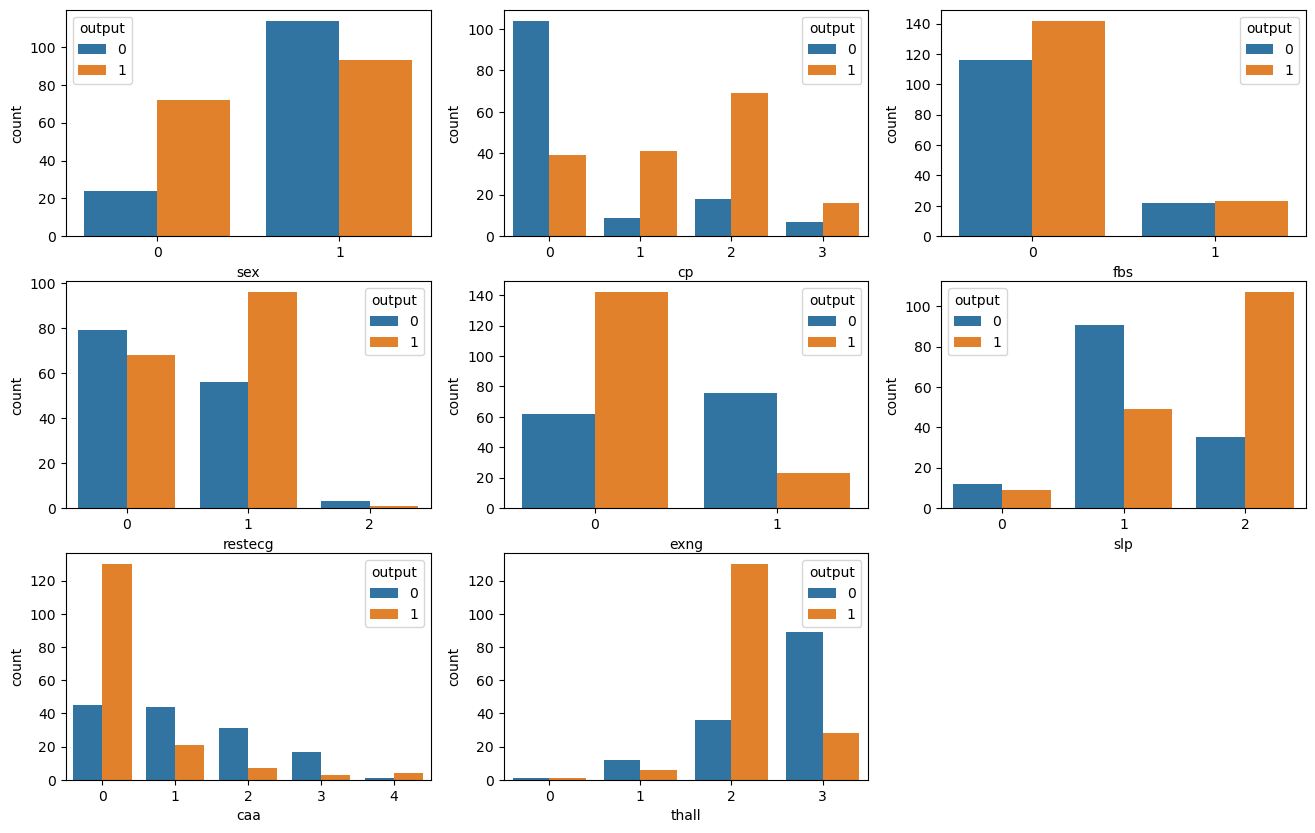

In [17]:
#visualizing categorical data
plt.figure(figsize=(16, 10))
plt.subplot(3,3,1)
sns.countplot(x = 'sex', data = df, hue = 'output')
plt.subplot(3,3,2)
sns.countplot(x = 'cp', data = df, hue = 'output')
plt.subplot(3,3,3)
sns.countplot(x = 'fbs', data = df, hue='output')
plt.subplot(3,3,4)
sns.countplot(x = 'restecg', data = df, hue='output')
plt.subplot(3,3,5)
sns.countplot(x = 'exng', data = df, hue='output')
plt.subplot(3,3,6)
sns.countplot(x = 'slp', data = df, hue='output')
plt.subplot(3,3,7)
sns.countplot(x = 'caa', data = df, hue='output')
plt.subplot(3,3,8)
sns.countplot(x = 'thall', data = df, hue='output')
plt.show()

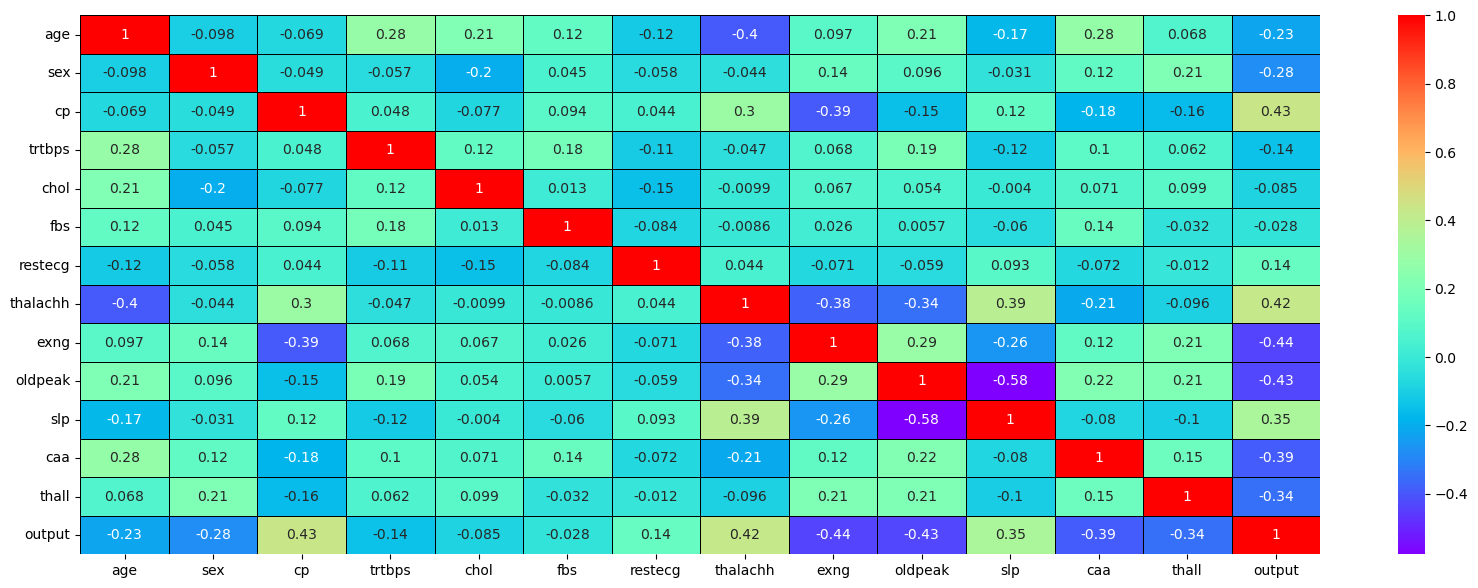

In [20]:
plt.figure(figsize=[20,7])
sns.heatmap(df.corr(),cmap='rainbow', annot=True, linecolor='black', linewidths=0.5)
plt.show()

## Data Preprocessing

In [23]:
X= df.drop('output',axis=1)
y=df['output']

In [25]:
#dividing the data into train-test data
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state =42)

In [26]:
X_train.shape,X_test.shape

((242, 13), (61, 13))

In [27]:
#standardizing the numerical continuous variable
scaler = MinMaxScaler()
X_train[['age','trtbps','chol','thalachh','oldpeak']] = scaler.fit_transform(X_train[['age','trtbps','chol','thalachh','oldpeak']])
X_test[['age','trtbps','chol','thalachh','oldpeak']] = scaler.transform(X_test[['age','trtbps','chol','thalachh','oldpeak']])

## Model Building

### Logistic Regression

In [29]:
lr = LogisticRegression()

In [30]:
lr.fit(X_train,y_train)

LogisticRegression()

In [31]:
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

In [32]:
#evaluating the model

print("Test Accuracy Score: ",accuracy_score(y_test,y_test_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_test_pred_lr))
print("Classification Report:")
print(classification_report(y_test,y_test_pred_lr))

Test Accuracy Score:  0.8360655737704918
Confusion Matrix:
[[25  4]
 [ 6 26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



### Decision Tree

In [41]:
dt = DecisionTreeClassifier(max_depth = 5,min_samples_split=10,random_state=42)

In [42]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

In [43]:
y_train_pred_dt = dt.predict(X_train)
y_test_pred_dt = dt.predict(X_test)

In [44]:
#evaluating the model

print("Test Accuracy Score: ",accuracy_score(y_test,y_test_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_test_pred_dt))
print("Classification Report:")
print(classification_report(y_test,y_test_pred_dt))

Test Accuracy Score:  0.8524590163934426
Confusion Matrix:
[[25  4]
 [ 5 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



### Random Forest

In [61]:
rf = RandomForestClassifier(n_estimators = 150, max_depth=5)

In [62]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=150)

In [63]:
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

In [64]:
#evaluating the model

print("Test Accuracy Score: ",accuracy_score(y_test,y_test_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_test_pred_rf))
print("Classification Report:")
print(classification_report(y_test,y_test_pred_rf))

Test Accuracy Score:  0.8688524590163934
Confusion Matrix:
[[24  5]
 [ 3 29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



### Using only the most important variables

In [65]:
X= df.drop(['age','sex','trtbps','chol','fbs','restecg','output'], axis =1)
y=df['output']

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state =42)

In [ ]:
X_train[['thalachh','oldpeak']] = scaler.fit_transform(X_train[['thalachh','oldpeak']])
X_test[['thalachh','oldpeak']] = scaler.transform(X_test[['thalachh','oldpeak']])

In [67]:
lr.fit(X_train,y_train)

LogisticRegression()

In [68]:
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

In [69]:
print("Test Accuracy Score: ",accuracy_score(y_test,y_test_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_test_pred_lr))
print("Classification Report:")
print(classification_report(y_test,y_test_pred_lr))

Test Accuracy Score:  0.8852459016393442
Confusion Matrix:
[[25  4]
 [ 3 29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Decision Tree

In [70]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

In [71]:
y_train_pred_dt = dt.predict(X_train)
y_test_pred_dt = dt.predict(X_test)

In [72]:
print("Test Accuracy Score: ",accuracy_score(y_test,y_test_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_test_pred_dt))
print("Classification Report:")
print(classification_report(y_test,y_test_pred_dt))

Test Accuracy Score:  0.8524590163934426
Confusion Matrix:
[[26  3]
 [ 6 26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



### Random Forest

In [73]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=150)

In [74]:
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

In [75]:
print("Test Accuracy Score: ",accuracy_score(y_test,y_test_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_test_pred_rf))
print("Classification Report:")
print(classification_report(y_test,y_test_pred_rf))

Test Accuracy Score:  0.8852459016393442
Confusion Matrix:
[[25  4]
 [ 3 29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

